In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [ ]:
df = pd.read_csv("../../data/interim/melb_data_wrangled.csv")

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_usd
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,776250.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1098750.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1200000.0
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,1407000.0
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1227000.0


In [ ]:
df.shape

(6519, 22)

In [ ]:
# Load the transformed data
df = pd.read_csv("../../data/interim/melb_data_wrangled.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6519 non-null   object 
 1   Address        6519 non-null   object 
 2   Rooms          6519 non-null   int64  
 3   Type           6519 non-null   object 
 4   Price          6519 non-null   float64
 5   Method         6519 non-null   object 
 6   SellerG        6519 non-null   object 
 7   Date           6519 non-null   object 
 8   Distance       6519 non-null   float64
 9   Postcode       6519 non-null   float64
 10  Bedroom2       6519 non-null   float64
 11  Bathroom       6519 non-null   float64
 12  Car            6519 non-null   float64
 13  Landsize       6519 non-null   float64
 14  BuildingArea   6519 non-null   float64
 15  YearBuilt      6519 non-null   float64
 16  CouncilArea    6519 non-null   object 
 17  Lattitude      6519 non-null   float64
 18  Longtitu

In [ ]:
# Split the data into features and target
X = df["BuildingArea"]
y = df["price_usd"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Reshape the data
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5215, 1), (1304, 1), (5215,), (1304,))

In [ ]:
y_mean = y_train.mean()
y_mean

712448.566970278

In [ ]:
y_pred_baseline = [y_mean] * len(y_train)

In [ ]:
len(y_pred_baseline) == len(y_train)

True

In [ ]:
y_pred_baseline[:5]

[712448.566970278,
 712448.566970278,
 712448.566970278,
 712448.566970278,
 712448.566970278]

In [ ]:
df["Price"].describe()

count    6.519000e+03
mean     9.475202e+05
std      3.772522e+05
min      1.310000e+05
25%      6.500000e+05
50%      8.600000e+05
75%      1.205000e+06
max      1.998000e+06
Name: Price, dtype: float64

In [ ]:
df["price_usd"].mean()

710640.1270133456

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

In [ ]:
mae_baseline

232558.73585308253

In [ ]:
print("Mean apt price", round(y_mean, 2))

Mean apt price 712448.57


In [ ]:
print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 232558.74


In [ ]:
# Split the data into features and target
X = df[["BuildingArea"]]
y = df[["price_usd"]]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5215, 1), (1304, 1), (5215, 1), (1304, 1))

In [ ]:
y_mean = y_train.mean()
y_mean

price_usd    712448.56697
dtype: float64

In [ ]:
# Create a dumb model
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]
len(y_pred_baseline) == len(y_train)

True

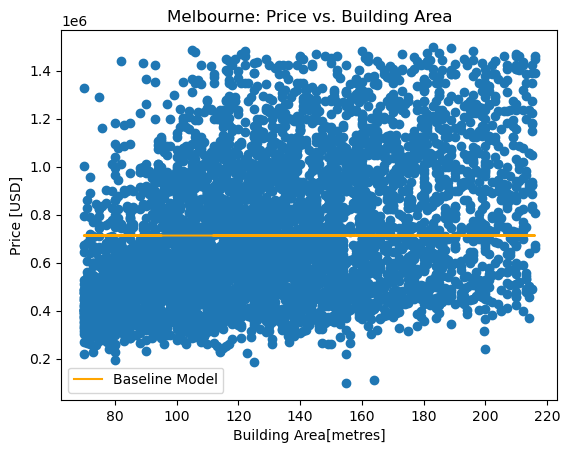

In [ ]:
# Visualize the baseline model
plt.plot(
    X_train.values, y_pred_baseline, color="orange", label="Baseline Model"
)
plt.scatter(X_train, y_train)
plt.xlabel("Building Area[metres]")
plt.ylabel("Price [USD]")
plt.title("Melbourne: Price vs. Building Area")
plt.legend()

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([[656455.05551027],
       [892850.20454451],
       [650545.17678441],
       [594401.32888878],
       [833751.41728595]])

In [ ]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 211517.95


In [ ]:
joblib.dump(model, "../../models/price_size_model.pkl")

['../../models/price_size_model.pkl']

In [ ]:
# Export the X_test and y_test
X_test.to_csv("../../data/interim/X_test.csv", index=False)
y_test.to_csv("../../data/interim/y_test.csv", index=False)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred[:5]

array([[644635.29805856],
       [768742.75130153],
       [685531.65884148],
       [943084.17371429],
       [771697.69066446]])

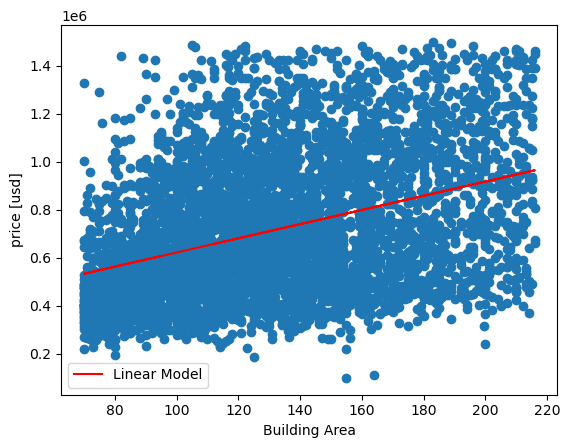

In [ ]:
plt.plot(X_train.squeeze(), model.predict(X_train), color="red", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Building Area")
plt.ylabel("price [usd]")
plt.legend()

In [ ]:
check_is_fitted(model)

In [ ]:
# Extract the model parameters
intercept = model.intercept_
print("Model Intercept:", intercept)
coefficient = model.coef_[0]
print('Model coefficient for "Building Area":', coefficient)

print(f"house_price = {intercept} + {coefficient} * Building Area")

Model Intercept: [325501.84686233]
Model coefficient for "Building Area": [2954.93936293]
house_price = [325501.84686233] + [2954.93936293] * Building Area


In [ ]:
# Calculate the MAE for predictions in y_pred against the actual values in y_test
mae_training = mean_absolute_error(y_test, y_pred)
print("Testing MAE:", round(mae_training, 2))

Testing MAE: 216524.68


In [ ]:
y_mean

price_usd    712448.56697
dtype: float64

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
mae_baseline
print("Mean h price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean h price price_usd    712448.57
dtype: float64
Baseline MAE: 232558.74
